# Проектная работа

# Определение перспективного тарифа для телеком-компании

**Описание проекта**: компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В  распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

*Описание тарифов*

*Тариф «Смарт»*

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

*Примечание*
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

*Описание данных*

**Таблица users (информация о пользователях)**:

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана

**Таблица calls (информация о звонках)**:

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях)**:

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях)**:

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах)**:

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Цель исследования**: проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
    
**План работы**: 
* Открытие файлов с данными и изучение общей информации
* Подготовка данных
1. приведение данных к нужным типам
2. нахождение и исправление ошибок в данных
3. расчет расходов и выручки по каждому пользователю по месяцам
* Анализ данных
1. проверка гипотез
* Общий вывод.

In [1]:
# импортируем все необходимые библиотеки

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import math

from scipy import stats as st

## Шаг 1. Открытие файлов с данными и изучение общей информации

In [70]:
# прочитаем файлы

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')  
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

# выведем на экран первые 20 строк каждого датафрейма

display(calls.head(20))
display(internet.head(20))
display(messages.head(20))
display(tariffs.head(20))
users.head(20)


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


в датафрейме internet при сохранении был добавлен «безымянный» индекс по умолчанию - 	Unnamed: 0. Чтобы от него избавиться, нужно прочитать датафрейм без индекса.

In [71]:
# прочитаем датафрейм без индекса

internet = pd.read_csv('/datasets/internet.csv', index_col=0)

internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Теперь все в порядке.

## Шаг 2. Подготовка данных
### Приведение данных к нужным типам

In [72]:
# посмотрим информацию о каждом датафрейме

calls.info()
internet.info()
messages.info()
tariffs.info()
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   

Проанализировав типы данных делаем вывод, что нужно привести к типу формата даты все соответствующие значения.

Кроме этого, просмотрев информацию по каждому датафрейму, можно сделать вывод, что пропущенных значений нет ни в одной таблице.
Дата прекращения пользования тарифом сюда не относится, т к пропущенные значения означают, что тариф ещё действовал на момент выгрузки данных.
    

In [73]:
# переведем даты в тип формата даты

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# посмотрим, как сработал код

calls.info()
internet.info()
messages.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB
<class 'pandas.core.fram

Тип данных дат изменен на формат даты.

### Нахождение и исправление ошибок в данных

Для нахождения и исправления ошибок в данных просмотрим столбцы каждого датафрейма, в котором могут быть ошибки.

In [74]:
# посмотрим, нет ли аномально больших значений в продолжительности звонков 

calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Максимальная продолжительность звонка составляет 38 минут, это приемлемое значение, медиана почти на уровне среднего, аномально больших значений в продолжительности звонков нет. Построим гистограмму.


array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

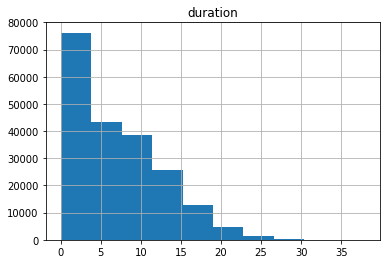

In [75]:
# построим гистограмму продолжительности звонков

calls.hist('duration')

Самая популярная продолжительность звонков от 0 до 4 минут. Посмотрим, много ли нулевых разговоров.

In [76]:
# посчитаем, сколько разговоров имели продолжительность 0 минут

calls_duration_null = (calls['duration'] == 0).sum()

calls_duration_null

39613

Будем считать данное количество (39613 из 202607) вполне приемлемым для звонков, когда абонент не смог ответить.

In [77]:
# проверим наличие дубликатов в таблице calls

calls.duplicated().sum()

0

Дубликатов нет.

In [78]:
# посмотрим, нет ли аномально больших значений в объеме потраченного за сессию интернет-трафика

internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Максимальный объём потраченного за сессию интернет-трафика составляет 1724 мб, это приемлемое значение, медиана почти на уровне среднего, аномально больших значений потраченного трафика нет. Построим гистограмму.

array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object)

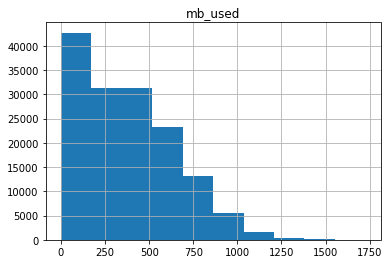

In [79]:
# построим гистограмму потраченного за сессию интернет-трафика

internet.hist('mb_used')

Наибольшую долю занимает трафик от 0 до 200 mb. Минимальный объём потраченного за сессию интернет-трафика составляет 0 мб. Посмотрим, много ли таких значений.

In [80]:
# создадим датафрейм с нулевыми значениями потраченного интернет-трафика

internet_null = internet[internet['mb_used'] == 0]

internet_null

,id,mb_used,session_date,user_id
11,1000_11,0.0,2018-08-28,1000
38,1000_38,0.0,2018-11-27,1000
46,1000_46,0.0,2018-06-30,1000
67,1000_67,0.0,2018-06-16,1000
72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499
149381,1499_142,0.0,2018-11-01,1499
149383,1499_144,0.0,2018-11-27,1499
149386,1499_147,0.0,2018-10-21,1499


Видим, что нулевых сессий очень много. 

In [81]:
# посмотрим по каждому пользователю количество нулевых сессий

internet_null_pivot = internet_null.pivot_table(index='user_id', values='mb_used', aggfunc='count').sort_values(by='mb_used')

# переименуем столбец - количество нулевых интернет-сессий

internet_null_pivot.columns=['count_internet_null']

internet_null_pivot

,count_internet_null
user_id,
1309,1
1346,1
1201,1
1084,1
1192,1
...,...
1227,121
1119,124
1429,125


Почти у каждого пользователя встречаются нулевые сессии, их количество от 1 до 144, проверим, какую долю занимают нулевые сессии от общего количества сессий.

In [82]:
# создадим сводный датафрейм с количеством сессий по каждому пользователю

internet_all_pivot = internet.pivot_table(index='user_id', values='mb_used', aggfunc='count').sort_values(by='mb_used')

# переименуем столбец - количество всех интернет-сессий

internet_all_pivot.columns=['count_internet_all']

internet_all_pivot

,count_internet_all
user_id,
1399,8
1192,22
1343,26
1467,27
1151,35
...,...
1251,759
1240,764
1204,789


По результатам исследования мы увидели, что ошибок в данных продолжительности звонков нет, а вот, что касается трафика, то почти у каждого пользователя (494 из 500 человек) есть нулевые сессии выхода в интернет, их количество колеблется от 1 до 144 в зависимости от конкретного пользователя.

,count_internet_null,count_internet_all,part_null
user_id,,,
1000,14.0,211,0.066351
1001,14.0,96,0.145833
1002,72.0,369,0.195122
1003,2.0,104,0.019231
1004,22.0,300,0.073333
...,...,...,...
1495,10.0,254,0.039370
1496,141.0,834,0.169065
1497,16.0,121,0.132231


array([[<AxesSubplot:title={'center':'part_null'}>]], dtype=object)

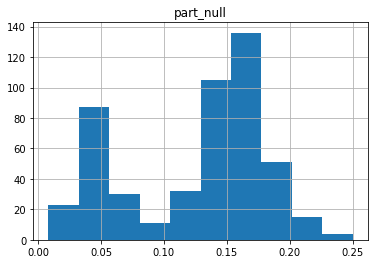

In [83]:
# объединим оба датафрейма с помощью метода join() без параметра on

mb_used = internet_null_pivot.join(internet_all_pivot, how='outer')

# добавим столбец с долей нулевых сессий по отношению ко всем сессиям

mb_used['part_null'] = mb_used['count_internet_null'] / mb_used['count_internet_all']

display(mb_used)

# построим гистограмму по столбцу с долей

mb_used.hist('part_null')

По результатам исследования делаем вывод, что почти у каждого пользователя (494 из 500 человек) есть нулевые сессии выхода в интернет, доля колеблется от 0,01 до 0,25. Самая часто встречаемая доля составляет  0,15-0,175.
Предлагаю задать вопрос заказчику, что это за нулевые сессии, так как предоставленной информации недостаточно.

In [84]:
# проверим наличие дубликатов в таблице internet

internet.duplicated().sum()

0

Дубликатов нет.

Далее посмотрим, нет ли ошибок в данных с названиями городов и возрастом пользователей.

In [85]:
# проверим категориальные данные в столбце sity датафрейма users

display(users['city'].value_counts().sort_values(ascending=False).head(20))

# проверим статистические данные по столбцу age датафрейма users

users['age'].describe()

Москва              99
Санкт-Петербург     39
Новосибирск         16
Омск                14
Казань              14
Уфа                 12
Ульяновск           11
Краснодар           11
Екатеринбург        11
Набережные Челны    11
Самара               9
Челябинск            9
Пермь                8
Волгоград            8
Нижний Новгород      8
Красноярск           7
Новокузнецк          7
Улан-Удэ             7
Вологда              7
Томск                6
Name: city, dtype: int64

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Ошибок или сомнительных данных в столбцах с городами и возрастом пользователей не обнаружено.

In [86]:
# проверим наличие дубликатов в таблице users

users.duplicated().sum()

0

Дубликатов нет.

In [87]:
# проверим наличие дубликатов в таблице messages

messages.duplicated().sum()

0

Дубликатов нет.

Таким образом, мы проверили ошибки в данных и наличие дубликатов, их не обнаружено. Однако, обратили внимание на сомнительные нулевые интернет-сессии, но исправить их мы не сможем, обратимся к заказчику с запросом доп информации по данному вопросу.

### Расчет расходов трафика звонков, сообщений и интернета по каждому пользователю по месяцам

In [88]:
# посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

# для начала добавим в датафрейм calls столбец с округленной продолжительностью звонков каждого разговора (согласно условиям тарифов)

calls['round_duration'] = np.ceil(calls['duration'])
    
# далее добавим в датафрейм calls столбец с месяцем, в котором сделан звонок

calls['month'] = calls['call_date'].dt.month

display(calls.head())

# создадим сводную таблицу с количеством звонков и израсходованными минутами по месяцам

calls_id = calls.pivot_table(index=['user_id', 'month'], values='round_duration', aggfunc=['count', 'sum'])

display(calls_id)

# переимуем столбцы для удобства

calls_id.columns=['count_calls', 'sum_duration_calls']

# добавим в датафрейм столбец, содержащий информацию из мультииндекса

calls_id['user_id_month'] = calls_id.index

# преобразуем мультииндекс в столбцы датафрейма

calls_id.reset_index(inplace=True)

# посчитаем и выведем на экран суммарную продолжительность звонков по всем пользователям

calls_id_total = calls_id['sum_duration_calls'].sum()

print(calls_id_total)

# выведем на экран получившийся датафрейм 

calls_id

,id,call_date,duration,user_id,round_duration,month
0,1000_0,2018-07-25,0.00,1000,0.0,7
1,1000_1,2018-08-17,0.00,1000,0.0,8
2,1000_2,2018-06-11,2.85,1000,3.0,6
3,1000_3,2018-09-21,13.80,1000,14.0,9
4,1000_4,2018-12-15,5.18,1000,6.0,12


count            sum
              round_duration round_duration
user_id month                              
1000    5                 22          159.0
        6                 43          172.0
        7                 47          340.0
        8                 52          408.0
        9                 58          466.0
...                      ...            ...
1498    10                41          247.0
1499    9                  9           70.0
        10                68          449.0
        11                74          612.0
        12                69          492.0

[3174 rows x 2 columns]

1450301.0


,user_id,month,count_calls,sum_duration_calls,user_id_month
0,1000,5,22,159.0,"(1000, 5)"
1,1000,6,43,172.0,"(1000, 6)"
2,1000,7,47,340.0,"(1000, 7)"
3,1000,8,52,408.0,"(1000, 8)"
4,1000,9,58,466.0,"(1000, 9)"
...,...,...,...,...,...
3169,1498,10,41,247.0,"(1498, 10)"
3170,1499,9,9,70.0,"(1499, 9)"
3171,1499,10,68,449.0,"(1499, 10)"
3172,1499,11,74,612.0,"(1499, 11)"


In [89]:
# удалим лишние столбцы

calls_id = calls_id.drop(['user_id', 'month'], 1)

calls_id

,count_calls,sum_duration_calls,user_id_month
0,22,159.0,"(1000, 5)"
1,43,172.0,"(1000, 6)"
2,47,340.0,"(1000, 7)"
3,52,408.0,"(1000, 8)"
4,58,466.0,"(1000, 9)"
...,...,...,...
3169,41,247.0,"(1498, 10)"
3170,9,70.0,"(1499, 9)"
3171,68,449.0,"(1499, 10)"
3172,74,612.0,"(1499, 11)"


Мы создали датафрейм calls_id в виде сводной таблицы, сделав разбивку по месяцам по каждому пользователю с информацией о количестве и продолжительности звонков. Дополнительно добавили столбец с мультииндексом (id пользователя и месяц), по нему будем в дальнейшем объединять датафреймы, а также удалили лишние столбцы.

Проделаем тоже самое с датафреймами messages и internet.

In [90]:
# посчитаем для каждого пользователя количество отправленных сообщений по месяцам

# для этого сначала добавим в датафрейм messages столбец с месяцем, в котором отправлено сообщение

messages['month'] = messages['message_date'].dt.month

display(messages.head())

# создадим сводную таблицу с количеством отправленных сообщений по месяцам

messages_id = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

display(messages_id)

# переимуем столбцы для удобства

messages_id.columns=['count_messages']

# добавим в датафрейм столбец, содержащий информацию из мультииндекса

messages_id['user_id_month'] = messages_id.index

display(messages_id)

# преобразуем мультииндекс в столбцы датафрейма

messages_id.reset_index(inplace=True)

display(messages_id)

# посчитаем и выведем на экран суммарное количество отправленных сообщений по всем пользователям

messages_id_total = messages_id['count_messages'].sum()

print(messages_id_total)

# выведем на экран получившийся датафрейм 

messages_id

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

count_messages user_id_month
user_id month                              
1000    5                  22     (1000, 5)
        6                  60     (1000, 6)
        7                  75     (1000, 7)
        8                  81     (1000, 8)
        9                  57     (1000, 9)
...                       ...           ...
1498    10                 42    (1498, 10)
1499    9                  11     (1499, 9)
        10                 48    (1499, 10)
        11                 59    (1499, 11)
        12                 66    (1499, 12)

[2717 rows x 2 columns]

,user_id,month,count_messages,user_id_month
0,1000,5,22,"(1000, 5)"
1,1000,6,60,"(1000, 6)"
2,1000,7,75,"(1000, 7)"
3,1000,8,81,"(1000, 8)"
4,1000,9,57,"(1000, 9)"
...,...,...,...,...
2712,1498,10,42,"(1498, 10)"
2713,1499,9,11,"(1499, 9)"
2714,1499,10,48,"(1499, 10)"
2715,1499,11,59,"(1499, 11)"


123036


,user_id,month,count_messages,user_id_month
0,1000,5,22,"(1000, 5)"
1,1000,6,60,"(1000, 6)"
2,1000,7,75,"(1000, 7)"
3,1000,8,81,"(1000, 8)"
4,1000,9,57,"(1000, 9)"
...,...,...,...,...
2712,1498,10,42,"(1498, 10)"
2713,1499,9,11,"(1499, 9)"
2714,1499,10,48,"(1499, 10)"
2715,1499,11,59,"(1499, 11)"


In [91]:
# удалим лишние столбцы

messages_id = messages_id.drop(['user_id', 'month'], 1)

messages_id

,count_messages,user_id_month
0,22,"(1000, 5)"
1,60,"(1000, 6)"
2,75,"(1000, 7)"
3,81,"(1000, 8)"
4,57,"(1000, 9)"
...,...,...
2712,42,"(1498, 10)"
2713,11,"(1499, 9)"
2714,48,"(1499, 10)"
2715,59,"(1499, 11)"


In [92]:
# посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам

# для этого сначала добавим в датафрейм internet столбец с месяцем, в котором совершен выход в интернет

internet['month'] = internet['session_date'].dt.month

display(internet.head())

# создадим сводную таблицу с суммарным количеством израсходованного интернет-трафика по месяцам

internet_id = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

display(internet_id)

# переведем мегабайты в гигабайты, округлив результат вверх

internet_id['sum_gb_used'] = np.ceil(internet_id['mb_used'] / 1024)

# добавим в датафрейм столбец, содержащий информацию из мультииндекса

internet_id['user_id_month'] = internet_id.index

# преобразуем мультииндекс в столбцы датафрейма

internet_id.reset_index(inplace=True)

# удалим столбец с данными в мегабайтах

internet_id = internet_id.drop(['mb_used'], 1)

# посчитаем и выведем на экран суммарное количество израсходованного интернет-трафика по всем пользователям

internet_id_total = internet_id['sum_gb_used'].sum()

print(internet_id_total)

# выведем на экран получившийся датафрейм 

internet_id


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

55599.0


,user_id,month,sum_gb_used,user_id_month
0,1000,5,3.0,"(1000, 5)"
1,1000,6,23.0,"(1000, 6)"
2,1000,7,14.0,"(1000, 7)"
3,1000,8,14.0,"(1000, 8)"
4,1000,9,15.0,"(1000, 9)"
...,...,...,...,...
3198,1498,10,21.0,"(1498, 10)"
3199,1499,9,2.0,"(1499, 9)"
3200,1499,10,18.0,"(1499, 10)"
3201,1499,11,18.0,"(1499, 11)"


In [93]:
# удалим ненужные столбцы

internet_id = internet_id.drop(['user_id', 'month'], 1)

internet_id

,sum_gb_used,user_id_month
0,3.0,"(1000, 5)"
1,23.0,"(1000, 6)"
2,14.0,"(1000, 7)"
3,14.0,"(1000, 8)"
4,15.0,"(1000, 9)"
...,...,...
3198,21.0,"(1498, 10)"
3199,2.0,"(1499, 9)"
3200,18.0,"(1499, 10)"
3201,18.0,"(1499, 11)"


In [94]:
# для расчета помесячной выручки с каждого пользователя объединим последовательно все таблицы

df1 = calls_id.merge(internet_id, on='user_id_month', how='outer').merge(messages_id, on='user_id_month', how='outer')

# выведем получившийся датафрейм

df1


,count_calls,sum_duration_calls,user_id_month,sum_gb_used,count_messages
0,22.0,159.0,"(1000, 5)",3.0,22.0
1,43.0,172.0,"(1000, 6)",23.0,60.0
2,47.0,340.0,"(1000, 7)",14.0,75.0
3,52.0,408.0,"(1000, 8)",14.0,81.0
4,58.0,466.0,"(1000, 9)",15.0,57.0
...,...,...,...,...,...
3209,NaN,NaN,"(1489, 8)",11.0,17.0
3210,NaN,NaN,"(1489, 9)",17.0,32.0
3211,NaN,NaN,"(1489, 10)",20.0,21.0
3212,NaN,NaN,"(1489, 11)",18.0,20.0


In [95]:
# заменим столбец 'user_id_month' на два столбца 'user_id' и 'month'

# для этого сначала уберем скобки из значений столбца 'user_id_month'

df1['user_id_month'] = df1['user_id_month'].astype (str). str.replace('(', '')

df1['user_id_month'] = df1['user_id_month'].astype (str). str.replace(')', '')

# разделим значения строки на два столбца

df1['user_id'] = df1['user_id_month'].str.split(',').str.get(0)

df1['month'] = df1['user_id_month'].str.split(',').str.get(1)

# посмотрим, что получилось

df1

/tmp/ipykernel_93/3866219970.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['user_id_month'] = df1['user_id_month'].astype (str). str.replace('(', '')
/tmp/ipykernel_93/3866219970.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['user_id_month'] = df1['user_id_month'].astype (str). str.replace(')', '')


,count_calls,sum_duration_calls,user_id_month,sum_gb_used,count_messages,user_id,month
0,22.0,159.0,"1000, 5",3.0,22.0,1000,5
1,43.0,172.0,"1000, 6",23.0,60.0,1000,6
2,47.0,340.0,"1000, 7",14.0,75.0,1000,7
3,52.0,408.0,"1000, 8",14.0,81.0,1000,8
4,58.0,466.0,"1000, 9",15.0,57.0,1000,9
...,...,...,...,...,...,...,...
3209,NaN,NaN,"1489, 8",11.0,17.0,1489,8
3210,NaN,NaN,"1489, 9",17.0,32.0,1489,9
3211,NaN,NaN,"1489, 10",20.0,21.0,1489,10
3212,NaN,NaN,"1489, 11",18.0,20.0,1489,11


In [96]:
# удалим столбец с комбинацией user_id и месяца

df1 = df1.drop(['user_id_month'], axis=1)

# для удобства поменяем столбцы местами при помощи переиндексирования

df1 = df1.reindex(columns=['user_id', 'month', 'count_calls', 'sum_duration_calls', 'sum_gb_used', 'count_messages'])

df1

,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages
0,1000,5,22.0,159.0,3.0,22.0
1,1000,6,43.0,172.0,23.0,60.0
2,1000,7,47.0,340.0,14.0,75.0
3,1000,8,52.0,408.0,14.0,81.0
4,1000,9,58.0,466.0,15.0,57.0
...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11.0,17.0
3210,1489,9,NaN,NaN,17.0,32.0
3211,1489,10,NaN,NaN,20.0,21.0
3212,1489,11,NaN,NaN,18.0,20.0


Посмотрим, успешно ли прошло объединение таблиц, для этого проверим следующие условия:

In [97]:
# равна ли суммарная продолжительность звонков по всем пользователям в новом датафрейме изначальным данным

# создадим переменную, хранящую суммарную продолжительность звонков по всем пользователям в новом датафрейме

df1_sum_duration_calls = df1['sum_duration_calls'].sum()

# проверим условие

if calls_id_total == df1_sum_duration_calls:
    print('Таблица calls_id присоединена успешно')
else:
    print('Таблица calls_id присоединена с ошибкой')

Таблица calls_id присоединена успешно


In [98]:
# равна ли сумма потраченного трафика по всем пользователям в новом датафрейме изначальным данным

# создадим переменную, хранящую сумму потраченного трафика по всем пользователям в новом датафрейме

df1_sum_gb_used = df1['sum_gb_used'].sum()

# проверим условие

if internet_id_total == df1_sum_gb_used:
    print('Таблица internet_id присоединена успешно')
else:
    print('Таблица internet_id присоединена с ошибкой')

Таблица internet_id присоединена успешно


In [99]:
# равно ли суммарное количество отправленных сообщений по всем пользователям в новом датафрейме изначальным данным

# создадим переменную, хранящую суммарное количество отправленных сообщений по всем пользователям в новом датафрейме

df1_count_messages = df1['count_messages'].sum()

# проверим условие

if messages_id_total == df1_count_messages:
    print('Таблица messages_id присоединена успешно')
else:
    print('Таблица messages_id присоединена с ошибкой')

Таблица messages_id присоединена успешно


Таким образом, три таблицы объединены успешно. Далее к новому датафрейму присоединим датафрейм с данными о пользователях - users.

In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             3214 non-null   object 
 1   month               3214 non-null   object 
 2   count_calls         3174 non-null   float64
 3   sum_duration_calls  3174 non-null   float64
 4   sum_gb_used         3203 non-null   float64
 5   count_messages      2717 non-null   float64
dtypes: float64(4), object(2)
memory usage: 175.8+ KB


In [101]:
# перед объединением датафреймов поменяем типы столбцов датафрейма df1 

df1['user_id'] = pd.to_numeric(df1['user_id'], errors='coerce').astype('int') 

df1['month'] = pd.to_numeric(df1['month'], errors='coerce').astype('int') 

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             3214 non-null   int64  
 1   month               3214 non-null   int64  
 2   count_calls         3174 non-null   float64
 3   sum_duration_calls  3174 non-null   float64
 4   sum_gb_used         3203 non-null   float64
 5   count_messages      2717 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


При попытке объединения датафреймов появилась ошибка о разнице типов столбцов, по которым объединяем, поэтому поменяли типы столбцов датафрейма df1.

In [102]:
# объединим датафреймы и выведем получившийся датафрейм df на экран

df = df1.merge(users, on='user_id', how='left')

df

,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,159.0,3.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,172.0,23.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,340.0,14.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,408.0,14.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,466.0,15.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11.0,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9,NaN,NaN,17.0,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10,NaN,NaN,20.0,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11,NaN,NaN,18.0,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


In [103]:
# создадим датафрейм df_correct, удалив из df столбцы 'age', 'churn_date', 'reg_date'

df_correct = df.drop(['age', 'churn_date', 'reg_date'], 1)

# переименуем столбец tariff на tariff_name, чтобы в дальнейшем объединить получившийся датафрейм с датафреймом tariffs

df_correct = df_correct.rename(columns={'tariff': 'tariff_name'})

# посмотрим, что получилось

df_correct

,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name
0,1000,5,22.0,159.0,3.0,22.0,Краснодар,Рафаил,Верещагин,ultra
1,1000,6,43.0,172.0,23.0,60.0,Краснодар,Рафаил,Верещагин,ultra
2,1000,7,47.0,340.0,14.0,75.0,Краснодар,Рафаил,Верещагин,ultra
3,1000,8,52.0,408.0,14.0,81.0,Краснодар,Рафаил,Верещагин,ultra
4,1000,9,58.0,466.0,15.0,57.0,Краснодар,Рафаил,Верещагин,ultra
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11.0,17.0,Санкт-Петербург,Павел,Гончаров,smart
3210,1489,9,NaN,NaN,17.0,32.0,Санкт-Петербург,Павел,Гончаров,smart
3211,1489,10,NaN,NaN,20.0,21.0,Санкт-Петербург,Павел,Гончаров,smart
3212,1489,11,NaN,NaN,18.0,20.0,Санкт-Петербург,Павел,Гончаров,smart


Вся необходимая информация на месте, теперь добавим в датафрейм информацию о тарифах.

In [104]:
# объединяем датафреймы, создав новый датафрейм df_income, используем тип слияния inner, он работает 
# по умолчанию, в новый датафрейм входят только те строки, которые совпадают в двух датафреймах

df_income = df_correct.merge(tariffs, on='tariff_name')

# выведем на экран

df_income

,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,3.0,22.0,Краснодар,Рафаил,Верещагин,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,23.0,60.0,Краснодар,Рафаил,Верещагин,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,14.0,75.0,Краснодар,Рафаил,Верещагин,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,14.0,81.0,Краснодар,Рафаил,Верещагин,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,15.0,57.0,Краснодар,Рафаил,Верещагин,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11.0,17.0,Санкт-Петербург,Павел,Гончаров,smart,50,15360,500,550,200,3,3
3210,1489,9,NaN,NaN,17.0,32.0,Санкт-Петербург,Павел,Гончаров,smart,50,15360,500,550,200,3,3
3211,1489,10,NaN,NaN,20.0,21.0,Санкт-Петербург,Павел,Гончаров,smart,50,15360,500,550,200,3,3
3212,1489,11,NaN,NaN,18.0,20.0,Санкт-Петербург,Павел,Гончаров,smart,50,15360,500,550,200,3,3


In [105]:
# посмотрим информацию о новом датафрейме

df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   count_calls            3174 non-null   float64
 3   sum_duration_calls     3174 non-null   float64
 4   sum_gb_used            3203 non-null   float64
 5   count_messages         2717 non-null   float64
 6   city                   3214 non-null   object 
 7   first_name             3214 non-null   object 
 8   last_name              3214 non-null   object 
 9   tariff_name            3214 non-null   object 
 10  messages_included      3214 non-null   int64  
 11  mb_per_month_included  3214 non-null   int64  
 12  minutes_included       3214 non-null   int64  
 13  rub_monthly_fee        3214 non-null   int64  
 14  rub_per_gb             3214 non-null   int64  
 15  rub_

Типы данных некоторых нужных столбцов в дальнейшем поменяем с float на int.
Пропущенных значений мало, причин возникновения может быть несколько: в каких-то месяцах клиент еще не был подключен к мобильному оператору, либо клиент может совсем не пользоваться сообщениями, звонками или интернетом.
Работаем с таблицей df_income.

### Расчет выручки по каждому пользователю по месяцам

In [106]:
# заменим пропущенные значения в необходимых столбцах на нули и поменяем тип на 'int'

df_income['sum_duration_calls'] = df_income['sum_duration_calls'].fillna(0).astype('int')

df_income['sum_gb_used'] = df_income['sum_gb_used'].fillna(0).astype('int')

df_income['count_messages'] = df_income['count_messages'].fillna(0).astype('int')

# проверим изменения

df_income.info()

df_income

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   count_calls            3174 non-null   float64
 3   sum_duration_calls     3214 non-null   int64  
 4   sum_gb_used            3214 non-null   int64  
 5   count_messages         3214 non-null   int64  
 6   city                   3214 non-null   object 
 7   first_name             3214 non-null   object 
 8   last_name              3214 non-null   object 
 9   tariff_name            3214 non-null   object 
 10  messages_included      3214 non-null   int64  
 11  mb_per_month_included  3214 non-null   int64  
 12  minutes_included       3214 non-null   int64  
 13  rub_monthly_fee        3214 non-null   int64  
 14  rub_per_gb             3214 non-null   int64  
 15  rub_

,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159,3,22,Краснодар,Рафаил,Верещагин,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172,23,60,Краснодар,Рафаил,Верещагин,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340,14,75,Краснодар,Рафаил,Верещагин,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408,14,81,Краснодар,Рафаил,Верещагин,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466,15,57,Краснодар,Рафаил,Верещагин,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,0,11,17,Санкт-Петербург,Павел,Гончаров,smart,50,15360,500,550,200,3,3
3210,1489,9,NaN,0,17,32,Санкт-Петербург,Павел,Гончаров,smart,50,15360,500,550,200,3,3
3211,1489,10,NaN,0,20,21,Санкт-Петербург,Павел,Гончаров,smart,50,15360,500,550,200,3,3
3212,1489,11,NaN,0,18,20,Санкт-Петербург,Павел,Гончаров,smart,50,15360,500,550,200,3,3


In [107]:
# переведем трафик, входящий в пакет тарифа, из МБ в ГБ, одновременно создав новый столбец

df_income['gb_per_month_included'] = df_income['mb_per_month_included'] / 1024

# удалим столбец с трафиком в МБ

df_income = df_income.drop(['mb_per_month_included'], 1)

df_income

,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,22.0,159,3,22,Краснодар,Рафаил,Верещагин,ultra,1000,3000,1950,150,1,1,30.0
1,1000,6,43.0,172,23,60,Краснодар,Рафаил,Верещагин,ultra,1000,3000,1950,150,1,1,30.0
2,1000,7,47.0,340,14,75,Краснодар,Рафаил,Верещагин,ultra,1000,3000,1950,150,1,1,30.0
3,1000,8,52.0,408,14,81,Краснодар,Рафаил,Верещагин,ultra,1000,3000,1950,150,1,1,30.0
4,1000,9,58.0,466,15,57,Краснодар,Рафаил,Верещагин,ultra,1000,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,0,11,17,Санкт-Петербург,Павел,Гончаров,smart,50,500,550,200,3,3,15.0
3210,1489,9,NaN,0,17,32,Санкт-Петербург,Павел,Гончаров,smart,50,500,550,200,3,3,15.0
3211,1489,10,NaN,0,20,21,Санкт-Петербург,Павел,Гончаров,smart,50,500,550,200,3,3,15.0
3212,1489,11,NaN,0,18,20,Санкт-Петербург,Павел,Гончаров,smart,50,500,550,200,3,3,15.0


In [108]:
# создадим функцию, вычисляющую перерасход

f = lambda row1, row2: row1 - row2

# создадим столбцы с перерасходом минут, ГБ и сообщений

df_income['overrun_minutes'] = f(df_income['sum_duration_calls'], df_income['minutes_included'])
df_income['overrun_gb'] = f(df_income['sum_gb_used'], df_income['gb_per_month_included']) 
df_income['overrun_messages'] = f(df_income['count_messages'], df_income['messages_included'])

# посмотрим, что получилось

df_income

,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,overrun_minutes,overrun_gb,overrun_messages
0,1000,5,22.0,159,3,22,Краснодар,Рафаил,Верещагин,ultra,1000,3000,1950,150,1,1,30.0,-2841,-27.0,-978
1,1000,6,43.0,172,23,60,Краснодар,Рафаил,Верещагин,ultra,1000,3000,1950,150,1,1,30.0,-2828,-7.0,-940
2,1000,7,47.0,340,14,75,Краснодар,Рафаил,Верещагин,ultra,1000,3000,1950,150,1,1,30.0,-2660,-16.0,-925
3,1000,8,52.0,408,14,81,Краснодар,Рафаил,Верещагин,ultra,1000,3000,1950,150,1,1,30.0,-2592,-16.0,-919
4,1000,9,58.0,466,15,57,Краснодар,Рафаил,Верещагин,ultra,1000,3000,1950,150,1,1,30.0,-2534,-15.0,-943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,0,11,17,Санкт-Петербург,Павел,Гончаров,smart,50,500,550,200,3,3,15.0,-500,-4.0,-33
3210,1489,9,NaN,0,17,32,Санкт-Петербург,Павел,Гончаров,smart,50,500,550,200,3,3,15.0,-500,2.0,-18
3211,1489,10,NaN,0,20,21,Санкт-Петербург,Павел,Гончаров,smart,50,500,550,200,3,3,15.0,-500,5.0,-29
3212,1489,11,NaN,0,18,20,Санкт-Петербург,Павел,Гончаров,smart,50,500,550,200,3,3,15.0,-500,3.0,-30


Видим отрицательные значения там, где перерасхода не было, заменим отрицательные на ноль.

In [109]:
# в тех ячейках, где перерасхода не было, заменим отрицательное значение на ноль

df_income['overrun_minutes'] = df_income['overrun_minutes'].where(df_income['overrun_minutes'] > 0, '0')

df_income['overrun_gb'] = df_income['overrun_gb'].where(df_income['overrun_gb'] > 0, '0')

df_income['overrun_messages'] = df_income['overrun_messages'].where(df_income['overrun_messages'] > 0, '0')

# посмотрим последние 20 строк получившейся таблицы

df_income.tail(20)


,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,overrun_minutes,overrun_gb,overrun_messages
3194,1496,10,72.0,450,28,35,Вологда,Трифон,Блохин,smart,50,500,550,200,3,3,15.0,0,13.0,0
3195,1496,11,80.0,662,25,46,Вологда,Трифон,Блохин,smart,50,500,550,200,3,3,15.0,162,10.0,0
3196,1496,12,80.0,518,21,51,Вологда,Трифон,Блохин,smart,50,500,550,200,3,3,15.0,18,6.0,1
3197,1497,10,66.0,490,12,20,Челябинск,Каролина,Агеева,smart,50,500,550,200,3,3,15.0,0,0,0
3198,1497,11,64.0,371,14,14,Челябинск,Каролина,Агеева,smart,50,500,550,200,3,3,15.0,0,0,0
3199,1497,12,71.0,545,20,17,Челябинск,Каролина,Агеева,smart,50,500,550,200,3,3,15.0,45,5.0,0
3200,1498,7,23.0,175,8,20,Владикавказ,Всеволод,Акимчин,smart,50,500,550,200,3,3,15.0,0,0,0
3201,1498,8,57.0,400,24,62,Владикавказ,Всеволод,Акимчин,smart,50,500,550,200,3,3,15.0,0,9.0,12
3202,1498,9,59.0,471,22,44,Владикавказ,Всеволод,Акимчин,smart,50,500,550,200,3,3,15.0,0,7.0,0
3203,1498,10,41.0,247,21,42,Владикавказ,Всеволод,Акимчин,smart,50,500,550,200,3,3,15.0,0,6.0,0


In [110]:
# проверим тип данных

df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   count_calls            3174 non-null   float64
 3   sum_duration_calls     3214 non-null   int64  
 4   sum_gb_used            3214 non-null   int64  
 5   count_messages         3214 non-null   int64  
 6   city                   3214 non-null   object 
 7   first_name             3214 non-null   object 
 8   last_name              3214 non-null   object 
 9   tariff_name            3214 non-null   object 
 10  messages_included      3214 non-null   int64  
 11  minutes_included       3214 non-null   int64  
 12  rub_monthly_fee        3214 non-null   int64  
 13  rub_per_gb             3214 non-null   int64  
 14  rub_per_message        3214 non-null   int64  
 15  rub_

Добавление столбцов прошло успешно.
Тип данных новых столбцов необходимо поменять на числовой, чтобы совершать математические действия.

In [111]:
# переводим в числовой тип данных, у трафика указываем тип целых чисел

df_income['overrun_minutes'] = pd.to_numeric(df_income['overrun_minutes'], errors='coerce')

df_income['overrun_gb'] = pd.to_numeric(df_income['overrun_gb'], errors='coerce').astype('int')

df_income['overrun_messages'] = pd.to_numeric(df_income['overrun_messages'], errors='coerce')

# проверяем информацию о датафрейме

df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   count_calls            3174 non-null   float64
 3   sum_duration_calls     3214 non-null   int64  
 4   sum_gb_used            3214 non-null   int64  
 5   count_messages         3214 non-null   int64  
 6   city                   3214 non-null   object 
 7   first_name             3214 non-null   object 
 8   last_name              3214 non-null   object 
 9   tariff_name            3214 non-null   object 
 10  messages_included      3214 non-null   int64  
 11  minutes_included       3214 non-null   int64  
 12  rub_monthly_fee        3214 non-null   int64  
 13  rub_per_gb             3214 non-null   int64  
 14  rub_per_message        3214 non-null   int64  
 15  rub_

In [112]:
# считаем выручку по каждому пользователю по месяцам

df_income['income_user'] = (df_income['overrun_minutes'] * df_income['rub_per_minute'] + df_income['overrun_gb'] * df_income['rub_per_gb'] + df_income['overrun_messages'] * df_income['rub_per_message']) + df_income['rub_monthly_fee']

df_income

,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,overrun_minutes,overrun_gb,overrun_messages,income_user
0,1000,5,22.0,159,3,22,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
1,1000,6,43.0,172,23,60,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
2,1000,7,47.0,340,14,75,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
3,1000,8,52.0,408,14,81,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
4,1000,9,58.0,466,15,57,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,0,11,17,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,0,0,550
3210,1489,9,NaN,0,17,32,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,2,0,950
3211,1489,10,NaN,0,20,21,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,5,0,1550
3212,1489,11,NaN,0,18,20,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,3,0,1150


In [113]:
# отфильтруем датафрейм df_income по тарифам

df_income_ultra = df_income[df_income['tariff_name'] == 'ultra']

df_income_smart = df_income[df_income['tariff_name'] == 'smart']

display(df_income_ultra)

df_income_smart

,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,overrun_minutes,overrun_gb,overrun_messages,income_user
0,1000,5,22.0,159,3,22,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
1,1000,6,43.0,172,23,60,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
2,1000,7,47.0,340,14,75,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
3,1000,8,52.0,408,14,81,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
4,1000,9,58.0,466,15,57,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1473,9,NaN,0,17,19,Красноярск,Николай,Лебедев,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
981,1473,10,NaN,0,14,20,Красноярск,Николай,Лебедев,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
982,1473,11,NaN,0,22,14,Красноярск,Николай,Лебедев,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
983,1473,12,NaN,0,18,20,Красноярск,Николай,Лебедев,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950


,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,overrun_minutes,overrun_gb,overrun_messages,income_user
985,1001,11,59.0,430,18,0,Москва,Иван,Ежов,smart,...,500,550,200,3,3,15.0,0,3,0,1150
986,1001,12,63.0,414,14,0,Москва,Иван,Ежов,smart,...,500,550,200,3,3,15.0,0,0,0,550
987,1002,6,15.0,117,11,4,Стерлитамак,Евгений,Абрамович,smart,...,500,550,200,3,3,15.0,0,0,0,550
988,1002,7,26.0,214,18,11,Стерлитамак,Евгений,Абрамович,smart,...,500,550,200,3,3,15.0,0,3,0,1150
989,1002,8,42.0,289,20,13,Стерлитамак,Евгений,Абрамович,smart,...,500,550,200,3,3,15.0,0,5,0,1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,0,11,17,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,0,0,550
3210,1489,9,NaN,0,17,32,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,2,0,950
3211,1489,10,NaN,0,20,21,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,5,0,1550
3212,1489,11,NaN,0,18,20,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,3,0,1150


In [114]:
# расчитаем по каждому тарифу среднюю и медианную выручку

df_income_ultra_mean = df_income_ultra['income_user'].mean()

df_income_ultra_median = df_income_ultra['income_user'].median()

df_income_smart_mean = df_income_smart['income_user'].mean()

df_income_smart_median = df_income_smart['income_user'].median()

# и выведем на экран

print(f'Средняя выручка по тарифу ultra {np.ceil(df_income_ultra_mean)}')

print(f'Медианная выручка по тарифу ultra {np.ceil(df_income_ultra_median)}')

print(f'Средняя выручка по тарифу smart {np.ceil(df_income_smart_mean)}')

print(f'Медианная выручка по тарифу smart {np.ceil(df_income_smart_median)}')

Средняя выручка по тарифу ultra 2071.0
Медианная выручка по тарифу ultra 1950.0
Средняя выручка по тарифу smart 1290.0
Медианная выручка по тарифу smart 1023.0


In [115]:
# добавим столбец с расчетом, на какую сумму пользователи с перерасходом пополняют телефон дополнительно
# в тарифе ultra

df_income_ultra['overrun_income'] = df_income_ultra['income_user'] - df_income_ultra['rub_monthly_fee']

display(df_income_ultra.tail(10))

# расчитаем долю выручки от перерасхода к общей выручке

part_overrun_income_ultra = df_income_ultra['overrun_income'].sum() / df_income_ultra['income_user'].sum()

part_overrun_income_ultra

/tmp/ipykernel_93/3858498398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_ultra['overrun_income'] = df_income_ultra['income_user'] - df_income_ultra['rub_monthly_fee']


,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,overrun_minutes,overrun_gb,overrun_messages,income_user,overrun_income
975,1231,12,NaN,0,32,191,Чебоксары,Касьян,Авдюков,ultra,...,1950,150,1,1,30.0,0,2,0,2250,300
976,1328,10,NaN,0,22,6,Мурманск,Рауль,Аркадьев,ultra,...,1950,150,1,1,30.0,0,0,0,1950,0
977,1328,11,NaN,0,35,8,Мурманск,Рауль,Аркадьев,ultra,...,1950,150,1,1,30.0,0,5,0,2700,750
978,1328,12,NaN,0,39,7,Мурманск,Рауль,Аркадьев,ultra,...,1950,150,1,1,30.0,0,9,0,3300,1350
979,1473,8,NaN,0,13,17,Красноярск,Николай,Лебедев,ultra,...,1950,150,1,1,30.0,0,0,0,1950,0
980,1473,9,NaN,0,17,19,Красноярск,Николай,Лебедев,ultra,...,1950,150,1,1,30.0,0,0,0,1950,0
981,1473,10,NaN,0,14,20,Красноярск,Николай,Лебедев,ultra,...,1950,150,1,1,30.0,0,0,0,1950,0
982,1473,11,NaN,0,22,14,Красноярск,Николай,Лебедев,ultra,...,1950,150,1,1,30.0,0,0,0,1950,0
983,1473,12,NaN,0,18,20,Красноярск,Николай,Лебедев,ultra,...,1950,150,1,1,30.0,0,0,0,1950,0
984,1476,4,NaN,0,1,0,Москва,Валентина,Семенова,ultra,...,1950,150,1,1,30.0,0,0,0,1950,0


0.05804031190230984

In [116]:
# добавим столбец с расчетом, на какую сумму пользователи с перерасходом пополняют телефон дополнительно
# в тарифе smart

df_income_smart['overrun_income'] = df_income_smart['income_user'] - df_income_smart['rub_monthly_fee']

display(df_income_smart.tail(10))

# расчитаем долю выручки от перерасхода к общей выручке

part_overrun_income_smart = df_income_smart['overrun_income'].sum() / df_income_smart['income_user'].sum()

part_overrun_income_smart

/tmp/ipykernel_93/3905054758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_smart['overrun_income'] = df_income_smart['income_user'] - df_income_smart['rub_monthly_fee']


,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,overrun_minutes,overrun_gb,overrun_messages,income_user,overrun_income
3204,1499,9,9.0,70,2,11,Пермь,Гектор,Корнилов,smart,...,550,200,3,3,15.0,0,0,0,550,0
3205,1499,10,68.0,449,18,48,Пермь,Гектор,Корнилов,smart,...,550,200,3,3,15.0,0,3,0,1150,600
3206,1499,11,74.0,612,18,59,Пермь,Гектор,Корнилов,smart,...,550,200,3,3,15.0,112,3,9,1513,963
3207,1499,12,69.0,492,13,66,Пермь,Гектор,Корнилов,smart,...,550,200,3,3,15.0,0,0,16,598,48
3208,1373,6,NaN,0,13,48,Улан-Удэ,Нелли,Афанасенко,smart,...,550,200,3,3,15.0,0,0,0,550,0
3209,1489,8,NaN,0,11,17,Санкт-Петербург,Павел,Гончаров,smart,...,550,200,3,3,15.0,0,0,0,550,0
3210,1489,9,NaN,0,17,32,Санкт-Петербург,Павел,Гончаров,smart,...,550,200,3,3,15.0,0,2,0,950,400
3211,1489,10,NaN,0,20,21,Санкт-Петербург,Павел,Гончаров,smart,...,550,200,3,3,15.0,0,5,0,1550,1000
3212,1489,11,NaN,0,18,20,Санкт-Петербург,Павел,Гончаров,smart,...,550,200,3,3,15.0,0,3,0,1150,600
3213,1489,12,NaN,0,17,35,Санкт-Петербург,Павел,Гончаров,smart,...,550,200,3,3,15.0,0,2,0,950,400


0.5736346623420931

In [117]:
display(df_income_ultra['income_user'].describe())

df_income_smart['income_user'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: income_user, dtype: float64

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: income_user, dtype: float64

<AxesSubplot:title={'center':'Распределение доходов от пользователей по месяцам по тарифу ультра'}, ylabel='Frequency'>

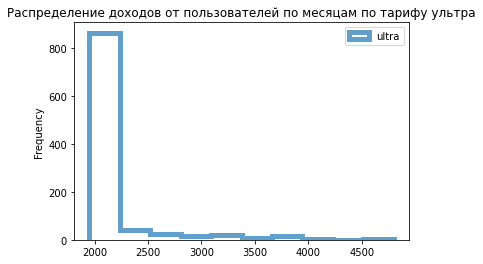

In [118]:
df_income_ultra.plot(kind='hist', title='Распределение доходов от пользователей по месяцам по тарифу ультра', 
    y='income_user',
    histtype='step',
    range=(1950, 4800),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='ultra',
)

<AxesSubplot:title={'center':'Распределение доходов от пользователей по месяцам по тарифу смарт'}, ylabel='Frequency'>

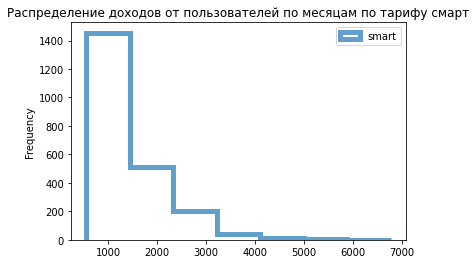

In [119]:
df_income_smart.plot(kind='hist', title='Распределение доходов от пользователей по месяцам по тарифу смарт', 
    y='income_user',
    histtype='step',
    range=(550, 6770),
    bins=7,
    linewidth=5,
    alpha=0.7,
    label='smart',
)

Просмотрев статистические данные и построив гистограммы распределения доходов от пользователей по месяцам в каждом из тарифов, видим, что

* тариф ультра: бОльшая часть выручки выходит за счет платы за тариф и лишь 5,8% составляет выручка за счет переплаты за тариф. Это объясняет, что среднее незначительно отличается от медианы. Преобладающее большинство пользователей платят в месяц от 1950 до 2250 руб в месяц.
* тариф смарт: 57,3 % выручки выходит за счет дополнительной платы сверх тарифа. На гистограмме мы видим пик в диапазоне от 550 руб до 1300 руб и длинный хвост после 3 тыс руб, поэтому среднее значение значительно отличается от медианного. 

Также отметим, что максимальный доход от пользователей больше в тарифе смарт (6770 руб) против максимального дохода 4800 руб в тарифе ультра).


Согласно расчетам, тариф ultra приносит больше денег коммерческому отделу, чем тариф smart. Однако. источники получения дохода отличаются: в тарифе ultra за счет высокой платы за тариф, в тарице smart за счет переплаты сверх тарифа.

## Анализ данных

In [120]:
# Рассчитаем средние показатели каждого исследуемого параметра, которые требуются пользователям каждого тарифа в месяц

# создадим функцию для расчета среднего:

def mean(row):
    mean = row.mean()
    return mean

# последовательно применим функцию для каждого показателя

sum_duration_calls_ultra_mean = mean(df_income_ultra['sum_duration_calls'])

print(f'Средняя продолжительность звонков пользоватeлей тарифа ultra в месяц в минутах {sum_duration_calls_ultra_mean}')

sum_gb_used_ultra_mean = mean(df_income_ultra['sum_gb_used'])

print(f'Средний трафик интернета пользователей тарифа ultra  в месяц в Гб {sum_gb_used_ultra_mean}')

count_messages_ultra_mean = mean(df_income_ultra['count_messages'])

print(f'Среднее количество сообщений пользователей тарифа ultra в месяц {count_messages_ultra_mean}')

sum_duration_calls_smart_mean = mean(df_income_smart['sum_duration_calls'])

print(f'Средняя продолжительность звонков пользователей тарифа smart в месяц в минутах {sum_duration_calls_smart_mean}')

sum_gb_used_smart_mean = mean(df_income_smart['sum_gb_used'])

print(f'Средний трафик интернета пользователей тарифа smart в месяц в Гб {sum_gb_used_smart_mean}')

count_messages_smart_mean = mean(df_income_smart['count_messages'])

print(f'Среднее количество сообщений пользователей тарифа smart в месяц {count_messages_smart_mean}')


Средняя продолжительность звонков пользоватeлей тарифа ultra в месяц в минутах 526.6233502538071
Средний трафик интернета пользователей тарифа ultra  в месяц в Гб 19.494416243654822
Среднее количество сообщений пользователей тарифа ultra в месяц 49.36345177664975
Средняя продолжительность звонков пользователей тарифа smart в месяц в минутах 417.9349484073576
Средний трафик интернета пользователей тарифа smart в месяц в Гб 16.328847016599372
Среднее количество сообщений пользователей тарифа smart в месяц 33.384028712427096


In [121]:
# Рассчитаем дисперсию каждого исследуемого параметра, которые требуются пользователям каждого тарифа в месяц

# создадим функцию для расчета дисперсии

def variance(row):
    variance = np.var(row, ddof=1)
    return variance

# последовательно применим функцию для каждого показателя

sum_duration_calls_ultra_variance = variance(df_income_ultra['sum_duration_calls'])

print(f'Дисперсия продолжительности звонков пользоватeлей тарифа ultra в месяц в минутах {np.ceil(sum_duration_calls_ultra_variance)}')

sum_gb_used_ultra_variance = variance(df_income_ultra['sum_gb_used'])

print(f'Дисперсия трафика интернета пользователей тарифа ultra  в месяц в Гб {np.ceil(sum_gb_used_ultra_variance)}')

count_messages_ultra_variance = variance(df_income_ultra['count_messages'])

print(f'Дисперсия количества сообщений пользователей тарифа ultra в месяц {np.ceil(count_messages_ultra_variance)}')

sum_duration_calls_smart_variance = variance(df_income_smart['sum_duration_calls'])

print(f'Дисперсия продолжительности звонков пользователей тарифа smart в месяц в минутах {np.ceil(sum_duration_calls_smart_variance)}')

sum_gb_used_smart_variance = variance(df_income_smart['sum_gb_used'])

print(f'Дисперсия трафика интернета пользователей тарифа smart в месяц в Гб {np.ceil(sum_gb_used_smart_variance)}')

count_messages_smart_variance = variance(df_income_smart['count_messages'])

print(f'Дисперсия количества сообщений пользователей тарифа smart в месяц {np.ceil(count_messages_smart_variance)}')

Дисперсия продолжительности звонков пользоватeлей тарифа ultra в месяц в минутах 100874.0
Дисперсия трафика интернета пользователей тарифа ultra  в месяц в Гб 98.0
Дисперсия количества сообщений пользователей тарифа ultra в месяц 2286.0
Дисперсия продолжительности звонков пользователей тарифа smart в месяц в минутах 36220.0
Дисперсия трафика интернета пользователей тарифа smart в месяц в Гб 34.0
Дисперсия количества сообщений пользователей тарифа smart в месяц 797.0


In [122]:
# расчитаем стандартное отклонение каждого исследуемого параметра, которые требуются пользователям каждого тарифа в месяц

# создадим функцию для расчета стандартного отклонения

def deviation(row):
    deviation = np.std(row)
    return deviation

# последовательно применим функцию для каждого показателя

sum_duration_calls_ultra_deviation = deviation(df_income_ultra['sum_duration_calls'])

print(f'Стандартное отклонение продолжительности звонков пользоватeлей тарифа ultra в месяц в минутах {np.ceil(sum_duration_calls_ultra_deviation)}')

sum_gb_used_ultra_deviation = deviation(df_income_ultra['sum_gb_used'])

print(f'Стандартное отклонение трафика интернета пользователей тарифа ultra  в месяц в Гб {np.ceil(sum_gb_used_ultra_deviation)}')

count_messages_ultra_deviation = deviation(df_income_ultra['count_messages'])

print(f'Стандартное отклонение количества сообщений пользователей тарифа ultra в месяц {np.ceil(count_messages_ultra_deviation)}')

sum_duration_calls_smart_deviation = deviation(df_income_smart['sum_duration_calls'])

print(f'Стандартное отклонение продолжительности звонков пользователей тарифа smart в месяц в минутах {np.ceil(sum_duration_calls_smart_deviation)}')

sum_gb_used_smart_deviation = deviation(df_income_smart['sum_gb_used'])

print(f'Стандартное отклонение трафика интернета пользователей тарифа smart в месяц в Гб {np.ceil(sum_gb_used_smart_deviation)}')

count_messages_smart_deviation = deviation(df_income_smart['count_messages'])

print(f'Стандартное отклонение количества сообщений пользователей тарифа smart в месяц {np.ceil(count_messages_smart_deviation)}')

Стандартное отклонение продолжительности звонков пользоватeлей тарифа ultra в месяц в минутах 318.0
Стандартное отклонение трафика интернета пользователей тарифа ultra  в месяц в Гб 10.0
Стандартное отклонение количества сообщений пользователей тарифа ultra в месяц 48.0
Стандартное отклонение продолжительности звонков пользователей тарифа smart в месяц в минутах 191.0
Стандартное отклонение трафика интернета пользователей тарифа smart в месяц в Гб 6.0
Стандартное отклонение количества сообщений пользователей тарифа smart в месяц 29.0


Проанализировав дисперсию и стандартное отклонение, делаем вывод, что в тарифе smart показатели более сгруппированы вокруг среднего (показатели дисперсии и стандартного отклонения ниже в тарифе smart, чем в тарифе ultra). 

In [123]:
# посмотрим статистические данные и сравним их со значениями, получившимися выше

# по параметру продолжительность звонков для тарифа ultra

display(df_income_ultra['sum_duration_calls'].describe())

# по параметру продолжительность звонков для тарифа smart

df_income_smart['sum_duration_calls'].describe()



count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: sum_duration_calls, dtype: float64

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: sum_duration_calls, dtype: float64

<AxesSubplot:title={'center':'Распределение суммарной продолжительности звонков в месяц по обоим тарифам'}, ylabel='Frequency'>

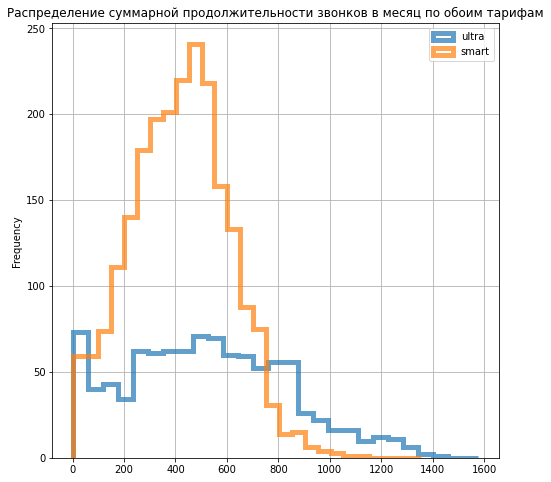

In [124]:
# построим гистограммы по суммарной продолжительности звонков в месяц по всем тарифам


ax = df_income_ultra.plot(kind='hist', title='Распределение суммарной продолжительности звонков в месяц по обоим тарифам', 
    y='sum_duration_calls',
    histtype='step',
    range=(0, 1578),
    figsize=(8,8),
    bins=27,
    linewidth=5,
    alpha=0.7,
    label='ultra',
)

df_income_smart.plot(
    kind='hist',
    y='sum_duration_calls',
    histtype='step',
    range=(0, 1354),
    figsize=(8,8),
    bins=27,
    linewidth=5,
    alpha=0.7,
    label='smart',
    ax=ax,
    grid=True,
    legend=True,
) 
          
          

Text(0.5, 0, 'Распределение отправленных сообщений по тарифу ultra')

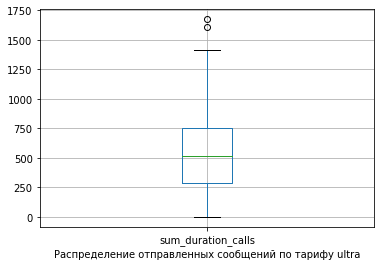

In [125]:
# построим диаграммы размаха по распределению отправленных сообщений в тарифе ultra

df_income_ultra.boxplot(column=['sum_duration_calls'])

plt.xlabel('Распределение отправленных сообщений по тарифу ultra')

Text(0.5, 0, 'Распределение отправленных сообщений по тарифу smart')

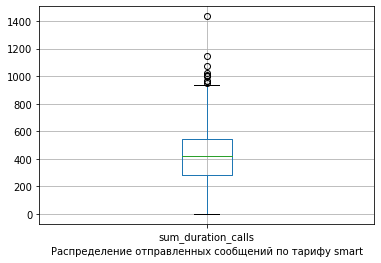

In [126]:
# построим диаграммы размаха по распределению отправленных сообщений в тарифе smart

df_income_smart.boxplot(column=['sum_duration_calls'])

plt.xlabel('Распределение отправленных сообщений по тарифу smart')

Распределение суммарной продолжительности звонков по тарифу smart напоминает колокол, стремится к нормальному, но имеет скошенность справа, а также имеет пик от 450 до 500 мин в месяц и третий пик 500-550 мин. Можно предположить, что хоть большинство пользователей пытаются уложиться в минуты пакета, пользователям не достаточно минут, входящих в трафик (т к третий пик приходится на количество минут, превышающее количество, входящее в пакет). По диаграмме размаха видим аномальные значения свыше 950 минут. 
Параметр суммарной продолжительности  звонков по тарифу ultra не имеет нормального распределения, есть длинный хвост с  высокими значениями и значительное количество нулевой продолжительности звонков, пик приходится на 0-60 мин в месяц, второй пик от 470-530 мин в месяц. В пакет входит 3000 мин, но ни одному из пользователей так много не нужно (максимальное количество - 1673 мин - это мы увидели ранее при вызове метода describe). По диаграмме размаха видим, что свыше 1450 мин наблюдаются аномальные значения.
Можем сделать вывод, что тариф smart (имея нормальное распределение) эффективен для пользователей, удовлетворяет их нужды в плане звонков, но пользователям достаточно часто приходится переплачивать. А тариф ultra нужно доработать, сократить количество минут до 1450 минут, а также,  исходя из потребностей потребителей, можно разделить тариф на несколько тарифов, так как очень много пользователей с нулевой продолжительностью звонков (им можно максимально сократить звонки).

In [127]:
# посмотрим статистические данные

# по параметру потраченного трафика по тарифу ultra

display(df_income_ultra['sum_gb_used'].describe())

# по параметру потраченного трафика по тарифу smart

df_income_smart['sum_gb_used'].describe()



count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: sum_gb_used, dtype: float64

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: sum_gb_used, dtype: float64

<AxesSubplot:title={'center':'Распределение потраченного трафика в месяц по обоим тарифам'}, ylabel='Frequency'>

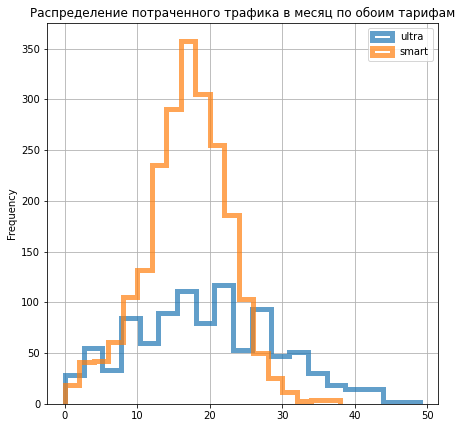

In [128]:
# построим гистограммы по потраченному трафику в месяц по всем тарифам

ax = df_income_ultra.plot(kind='hist', title='Распределение потраченного трафика в месяц по обоим тарифам', 
    y='sum_gb_used',
    histtype='step',
    range=(0, 49),
    bins=19,
    figsize=(7, 7),
    linewidth=5,
    alpha=0.7,
    label='ultra',
)

df_income_smart.plot(
    kind='hist',
    y='sum_gb_used',
    histtype='step',
    range=(0, 38),
    bins=19,
    figsize=(7, 7),
    linewidth=5,
    alpha=0.7,
    label='smart',
    ax=ax,
    grid=True,
    legend=True,
) 

Text(0.5, 0, 'Распределение потраченного трафика по тарифу ultra')

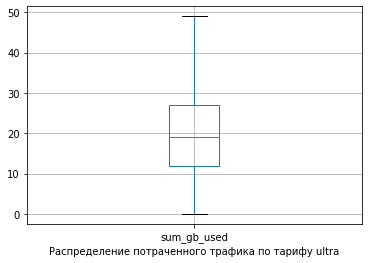

In [129]:
# построим диаграммы размаха по распределению трафика интернета в тарифе ultra

df_income_ultra.boxplot(column=['sum_gb_used'])

plt.xlabel('Распределение потраченного трафика по тарифу ultra')


Text(0.5, 0, 'Распределение потраченного трафика по тарифу smart')

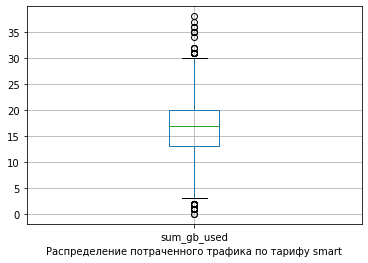

In [130]:
# построим диаграммы размаха по распределению трафика интернета в тарифе smart

df_income_smart.boxplot(column=['sum_gb_used'])

plt.xlabel('Распределение потраченного трафика по тарифу smart')

Распределение потраченного трафика по тарифу smart напоминает колокол, стремится к нормальному, имеет пик от 16 до 18 гб в месяц, второй пик - 18-20 гб. Это показывает, что выделенных пакетом 15 гб пользователям не хватает, и они часто переплачивают, и не стремятся уложиться в тариф. По диаграмме размаха видим. что до 3 гб и свыше 30 гб наблюдаются выбросы, значит, такие значения можем считать аномальными, но в нашем случае, они не имеют значения, тк в пакет включено 15 гб. Можно предложить увеличить трафик интернета до 25 или 30 гб, увеличив стоимость пакета.
Параметр потраченного трафика по тарифу ultra не имеет нормального распределения, пик приходится на 20-24 гб, второй пик - 5-7,5 гб. Лишь небольшое количество пользователей не укладываются в пакет и переплачивают. По диаграмме размаха видим, что выбросов нет, распределение не выявило аномальных наблюдений, это может означать, что количество трафика в пакете ultra выбрано верно.

In [131]:
# посмотрим статистические данные

# по параметру количества сообщений по тарифу ultra

display(df_income_ultra['count_messages'].describe())

# по параметру количества сообщений по тарифу smart

df_income_smart['count_messages'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: count_messages, dtype: float64

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: count_messages, dtype: float64

<AxesSubplot:title={'center':'Распределение отправленных сообщений в месяц по обоим тарифам'}, ylabel='Frequency'>

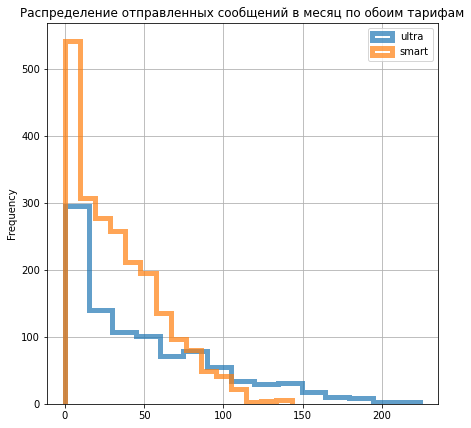

In [132]:
# построим гистограммы по количеству сообщений в месяц по всем тарифам

ax = df_income_ultra.plot(kind='hist', title='Распределение отправленных сообщений в месяц по обоим тарифам', 
    y='count_messages',
    histtype='step',
    range=(0, 224),
    bins=15,
    figsize=(7,7),
    linewidth=5,
    alpha=0.7,
    label='ultra',
)

df_income_smart.plot(
    kind='hist',
    y='count_messages',
    histtype='step',
    range=(0, 143),
    bins=15,
    figsize=(7,7),
    linewidth=5,
    alpha=0.7,
    label='smart',
    ax=ax,
    grid=True,
    legend=True,
) 

Text(0.5, 0, 'Распределение отправленных сообщений по тарифу ultra')

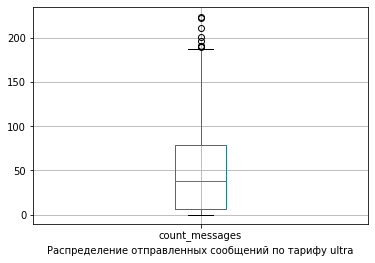

In [133]:
# построим диаграммы размаха по распределению отправленных сообщений в тарифе ultra

df_income_ultra.boxplot(column=['count_messages'])

plt.xlabel('Распределение отправленных сообщений по тарифу ultra')

Text(0.5, 0, 'Распределение отправленных сообщений по тарифу smart')

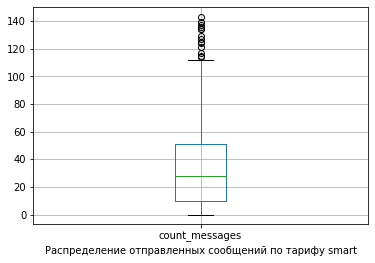

In [134]:
# построим диаграммы размаха по распределению отправленных сообщений в тарифе smart

df_income_smart.boxplot(column=['count_messages'])

plt.xlabel('Распределение отправленных сообщений по тарифу smart')

Распределение отправленных сообщений в месяц по тарифу smart не имеет нормального распределения, имеет пик от 0 до 10 сообщений в месяц, но также немалое количество пользователей отправляют свыше 50 сообщений в месяц, т е переплачивают и не укладываются в тариф. По диаграмме размаха аномальные значения наблюдаются свыше 110  сообщений в месяц.
Распределение отправленных сообщений в месяц по тарифу ultra похоже, пик немного отличается, а именно: от 0 до 15 сообщений в месяц, а самое максимальное количество сообщений 224 сообщения, что в 4 раза меньше количества, включенного в пакет. По диаграмме размаха видим аномальные значения свыше 185 сообщений в месяц, т е таких значений крайне мало.
Можно предложить увеличить количество сообщений в пакете smart до 110, а в тарифе ultra снизить до 200.

### Проверка гипотез

#### Гипотеза первая. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Нулевая гипотеза. Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

Альтернативная гипотеза. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [135]:
# проверим гипотезы о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт» с помощью t-теста

# параметр equal_var зададим False, т к мы знаем, что выборки разного размера

df_income_ultra_sample = df_income_ultra['income_user']

df_income_smart_sample = df_income_smart['income_user']

alpha = 0.05

results = st.ttest_ind(df_income_ultra_sample, df_income_smart_sample, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('не получилось отвергнуть нулевую гипотезу')

p-значение: 4.2606313931076085e-250
отвергаем нулевую гипотезу


По результатам проверки гипотезы отвергаем нулевую гипотезу и не отвергаем альтернативную гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

#### Гипотеза вторая. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза. Средняя выручка пользователей из Москвы и регионов равны.

Альтернативная гипотеза. Средняя выручка пользователей из Москвы и регионов различаются.

In [136]:
# отфильтруем датафрейм df_income по городам - Москва и регионы

df_income_Moscow = df_income[df_income['city'] == 'Москва']

df_income_region = df_income[df_income['city'] != 'Москва']

display(df_income_Moscow)

df_income_region

,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,overrun_minutes,overrun_gb,overrun_messages,income_user
8,1003,8,55.0,380,9,37,Москва,Белла,Белякова,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
9,1003,9,134.0,961,13,91,Москва,Белла,Белякова,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
10,1003,10,108.0,855,15,83,Москва,Белла,Белякова,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
11,1003,11,115.0,824,12,94,Москва,Белла,Белякова,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
12,1003,12,108.0,802,10,75,Москва,Белла,Белякова,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,1490,8,45.0,346,17,50,Москва,Радомир,Алесин,smart,...,500,550,200,3,3,15.0,0,2,0,950
3169,1490,9,44.0,322,15,48,Москва,Радомир,Алесин,smart,...,500,550,200,3,3,15.0,0,0,0,550
3170,1490,10,42.0,312,21,45,Москва,Радомир,Алесин,smart,...,500,550,200,3,3,15.0,0,6,0,1750
3171,1490,11,38.0,282,19,47,Москва,Радомир,Алесин,smart,...,500,550,200,3,3,15.0,0,4,0,1350


,user_id,month,count_calls,sum_duration_calls,sum_gb_used,count_messages,city,first_name,last_name,tariff_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,overrun_minutes,overrun_gb,overrun_messages,income_user
0,1000,5,22.0,159,3,22,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
1,1000,6,43.0,172,23,60,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
2,1000,7,47.0,340,14,75,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
3,1000,8,52.0,408,14,81,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
4,1000,9,58.0,466,15,57,Краснодар,Рафаил,Верещагин,ultra,...,3000,1950,150,1,1,30.0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,0,11,17,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,0,0,550
3210,1489,9,NaN,0,17,32,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,2,0,950
3211,1489,10,NaN,0,20,21,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,5,0,1550
3212,1489,11,NaN,0,18,20,Санкт-Петербург,Павел,Гончаров,smart,...,500,550,200,3,3,15.0,0,3,0,1150


In [137]:
# проверим гипотезы о равенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов  с помощью t-теста

# параметр equal_var зададим False, т к мы знаем, что выборки разного размера

df_income_Moscow_sample = df_income_Moscow['income_user']

df_income_region_sample = df_income_region['income_user']

alpha = 0.05

results = st.ttest_ind(df_income_Moscow_sample, df_income_region_sample, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5257376663729298
не получилось отвергнуть нулевую гипотезу


По результатам проверки гипотезы - не получилось отвергнуть нулевую гипотезу о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

При формулировании нулевой гипотезы мы указали знак равенства, а в альтернативной гипотезе, наоборот, указали, что параметры не равны друг другу, таким образом, мы покрыли  все варианты.

### Вывод

Проанализировав поведение клиентов, можно сделать вывод, что:

* тариф ultra приносит больше денег коммерческому отделу, чем тариф smart, однако,

* между тарифами огромная разница в том, что доход от пользователей тарифа ultra идет за счет стоимости пакета и лишь 5,8% занимают переплаты пользователей сверх пакета, а доход от пользователей тарифа smart на 57,3% состоит из переплаты пользователей сверх тарифа,

* можно предложить увеличить количество сообщений в пакете smart до 110, а в тарифе ultra снизить до 200,

* количество трафика интернета в тарифе ultra, в целом, выбрано верно, лишь небольшое количество пользователей не укладываются в пакет и переплачивают. В тарифе smart можно предложить увеличить трафик до 25 или 30 гб за счет увеличения стоимости за тариф, 

* тариф ultra нужно доработать, сократить количество минут до 1450 минут, а также,  исходя из потребностей потребителей, можно разделить тариф на несколько тарифов, так как очень много пользователей имеют нулевую продолжительность звонков (им можно максимально сократить звонки). Пользователи тарифа smart часто переплачивают за минуты разговора и не стремятся уложиться в тариф, им можно увеличить продолжительность звонков до 800 мин за счет увеличения цены тарифа.

Отдельно добавим, что по результатам исследования, почти у каждого пользователя (494 из 500 человек) есть нулевые сессии выхода в интернет, их доля колеблется от 0,01 до 0,25. Самая часто встречаемая доля составляет 0,15-0,175, то есть от 15 до 17,5% выходов в интернет имеют нулевые сессии. Предлагаю задать вопрос заказчику, что это за нулевые сессии, так как предоставленной информации недостаточно.

Предлагаю тариф ultra разделить на два тарифа, чтобы количество минут и трафик интернета были подобраны более тщательно для разных категорий пользователей.
    